## ADABOOST ASSIGNMENT

 Brain Stroke Dataset

[https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset/data]

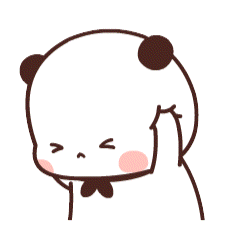

# Understanding AdaBoost

These algorithms boost prediction power by transforming a large number of weak learners into strong learners.

Boosting algorithms work on the idea of first building a model on the training dataset and then building a second model to correct the faults in the first model. This technique is repeated until the mistakes are reduced and the dataset is accurately predicted. Boosting algorithms function similarly in that they combine numerous models (weak learners) to produce the final result (strong learners).




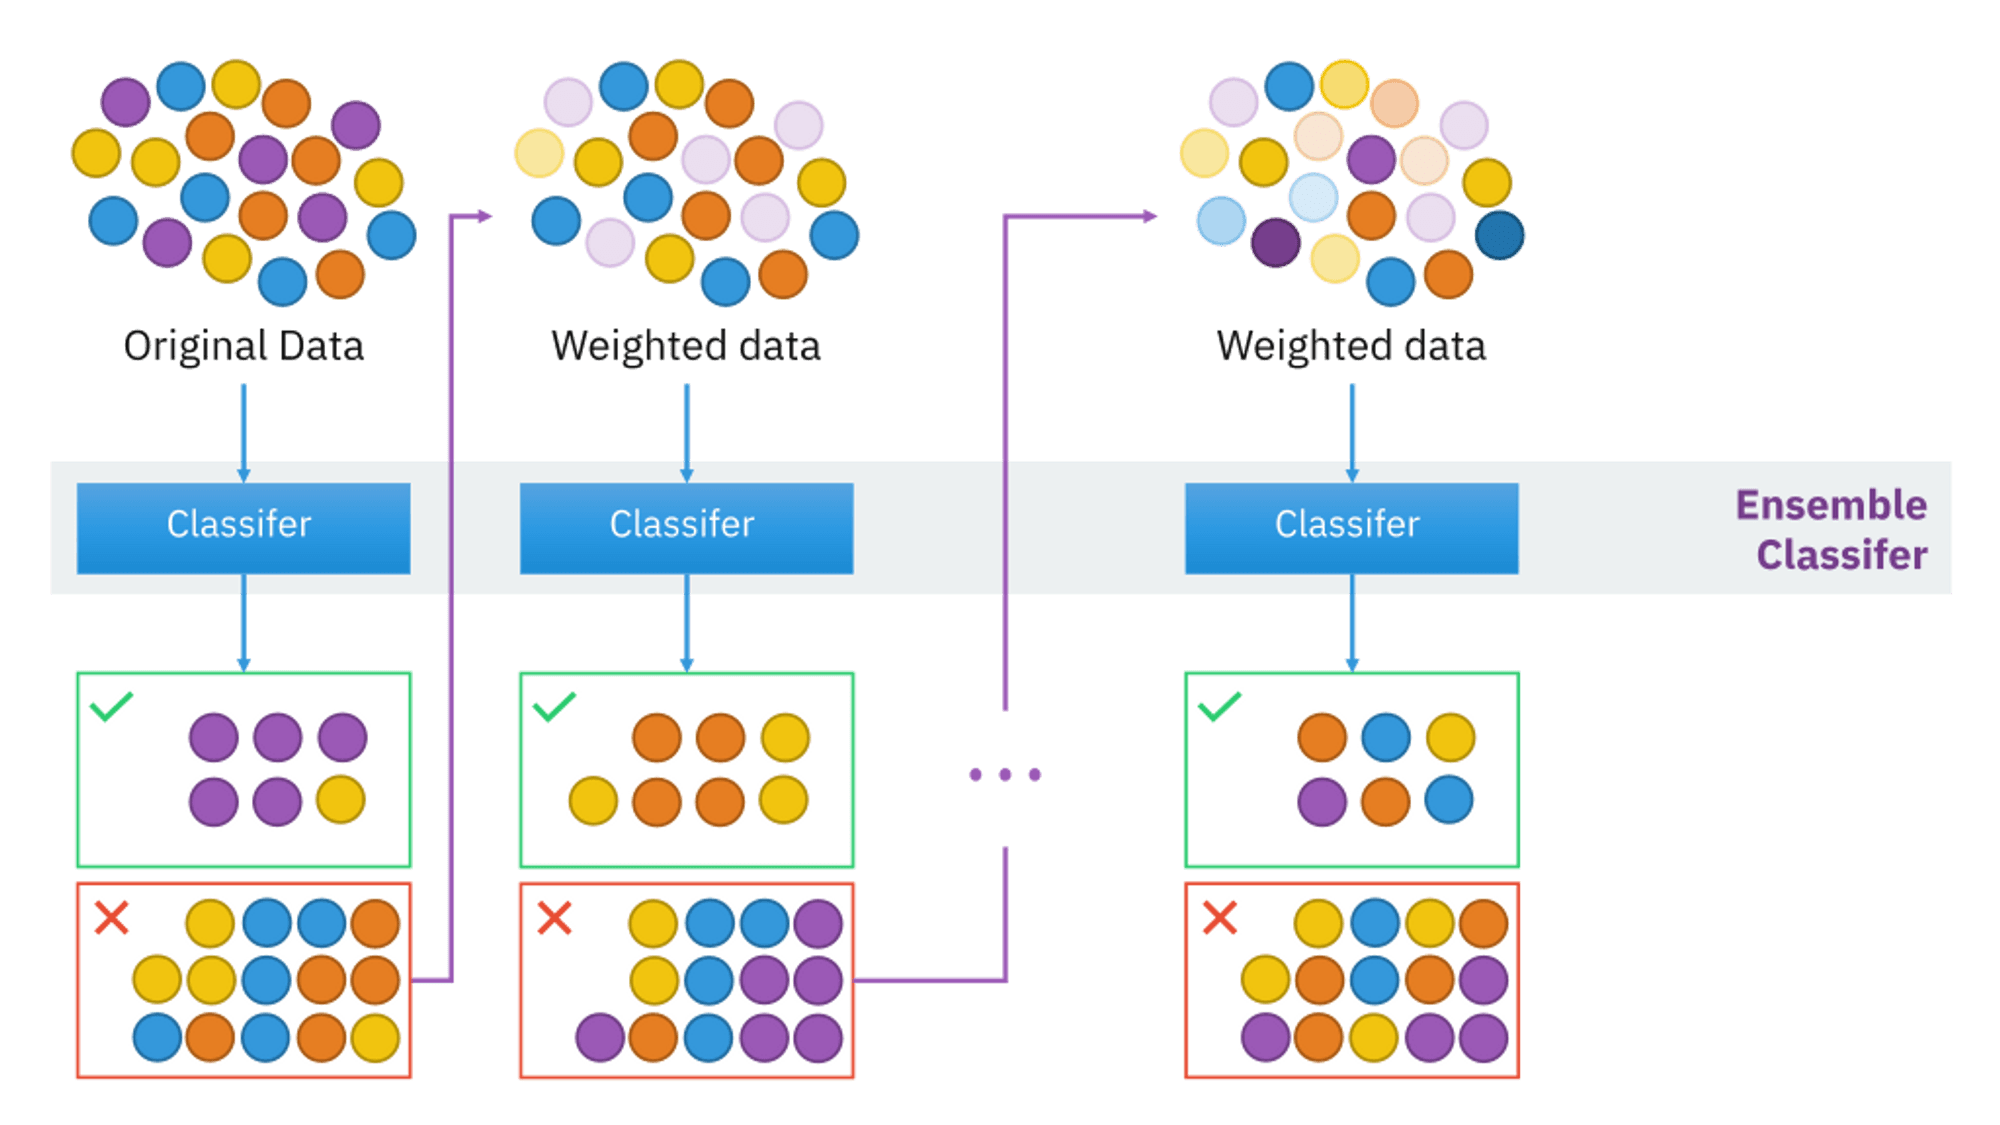

## Understanding the dataset (Please Read☠️ )


### Story of dataset:
#### Context:
A stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.

The main risk factor for stroke is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation. An ischemic stroke is typically caused by blockage of a blood vessel, though there are also less common causes. A hemorrhagic stroke is caused by either bleeding directly into the brain or into the space between the brain's membranes. Bleeding may occur due to a ruptured brain aneurysm. Diagnosis is typically based on a physical exam and is supported by medical imaging such as a CT scan or MRI scan. A CT scan can rule out bleeding, but may not necessarily rule out ischemia, which early on typically does not show up on a CT scan. Other tests such as an electrocardiogram (ECG) and blood tests are done to determine risk factors and rule out other possible causes. Low blood sugar may cause similar symptoms.

Prevention includes decreasing risk factors, surgery to open up the arteries to the brain in those with problematic carotid narrowing, and warfarin in people with atrial fibrillation. Aspirin or statins may be recommended by physicians for prevention. A stroke or TIA often requires emergency care. An ischemic stroke, if detected within three to four and half hours, may be treatable with a medication that can break down the clot. Some hemorrhagic strokes benefit from surgery. Treatment to attempt recovery of lost function is called stroke rehabilitation, and ideally takes place in a stroke unit; however, these are not available in much of the world.





### Attribute Information
1) gender: "Male", "Female" or "Other"

2) age: age of the patient

3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 5) Ever-married: "No" or "Yes"

6) work type: "children", "Govtjov", "Never worked", "Private" or "Self-employed"

7) Residencetype: "Rural" or "Urban"

8) avg glucose level: average glucose level in blood

9) BMI: body mass index

10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) stroke: 1 if the patient had a stroke or 0 if not





In [37]:
#Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

# dealing with the imbalance, we will over sample the dataset
from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [6]:
# Loading the dataset 
df = pd.read_csv('brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [9]:
df.describe() # Statistical summary

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


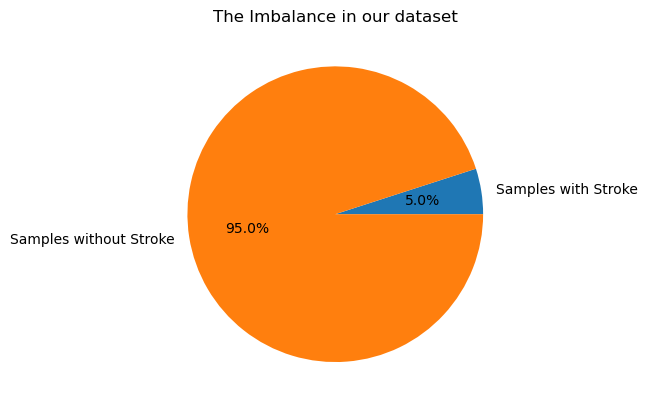

In [13]:
#Cheaking for imbalance in dataset

mylabels = ["Samples with Stroke", "Samples without Stroke"]
plt.pie([len(df[df['stroke']==1]),len(df[df['stroke']==0])], labels = mylabels,autopct='%1.1f%%')
plt.title('The Imbalance in our dataset')
plt.show()

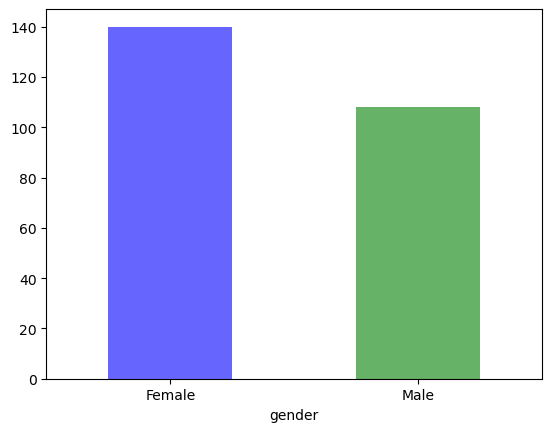

In [31]:
# Males vs Female brain strokes!
stroke_by_gender = df.groupby('gender')['stroke'].sum()
stroke_by_gender.plot(kind ='bar',color=['blue', 'green'],alpha = 0.6)
plt.xticks(rotation=0)
plt.show()


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## What I think needs to be done before EDA


1. There is a huge imbalance which is ok in the real world, but this might train our model to be biased towards one type of class     

2. There are strings or words in our dataset that needs to be encoded into numbers as the algorithm computes numbers easily

In [49]:
# Creating an object for RandomOversampler
ran = RandomOverSampler()

# Encoding

#for gender
df.gender = df.gender.map({'Male':1,'Female':0})

#for ever_married
df.ever_married =df.ever_married.map({'Yes':1,'No':0})

#for work_type
# the weights are based on stress level, therefore 0 for child
df.work_type = df.work_type.map({'Private':2,'Self-employed':3,'Govt_job':1,'children':0})

# for Residence_type
df.Residence_type = df.Residence_type.map({'Urban':1,'Rural':0})

#for smoking_status
df.smoking_status = df.smoking_status.map({'formerly smoked':2, 'never smoked':0, 'smokes':3, 'Unknown':1})



In [50]:
# Splitting data into input and output
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape,y.shape)

(4981, 10) (4981,)


In [51]:
# Over Sampling
x_resampled,y_resampled = ran.fit_resample(x,y)

print(x_resampled.shape,y_resampled.shape)

(9466, 10) (9466,)


In [52]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [53]:
# Creating an object of Adaboost class
ada_classifier = AdaBoostClassifier()

In [55]:
ada_classifier.fit(x_train,y_train)

AdaBoostClassifier()

In [56]:
# Predicting
y_pred = ada_classifier.predict(x_test)

In [58]:
# Evaluation
print(classification_report(y_test,y_pred),'😎❤️')

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       946
           1       0.76      0.85      0.80       948

    accuracy                           0.79      1894
   macro avg       0.79      0.79      0.79      1894
weighted avg       0.79      0.79      0.79      1894
 😎❤️
